# Statistics In python
This notebook is created as for note-taking and experimenting with the ***Introduction to statistics In Python*** course delivered by [Datacamp](https://app.datacamp.com/learn/courses/introduction-to-statistics-in-python).

In [5]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1st Chapter: Summary statistics
In this chapter we consider the most basic statistical funtions that would give a general, (maybe simple) idea about the data of interest.
Statistics can be divided into main categories:
* descriptive statistics: with the main aim of describing and summarizing the data. No generalization or conclusions are generally conceived
* inferential statistics: using a sample of data to make inferences (hypothesis) about large populations

### Measures of center
Data is called skewed if it shifter towards either the left or the right. In other words, the skewer a function is, the less symmetric it is. Among the first steps in analysis data, is understanding the center of the data. There is a number of statistics that might represent this idea:
* mean (average): the sum of all values divided by the total count of values
* median: the middle value that divides the distribution into two halves
* mode: the most frequent value
 

In [6]:
# let's experiment with the following dataset
food_consumption_link = "https://assets.datacamp.com/production/repositories/5786/datasets/49f6356966016c70a9f63a0474942675377bdcf2/food_consumption.csv"
f_c = pd.read_csv(food_consumption_link)

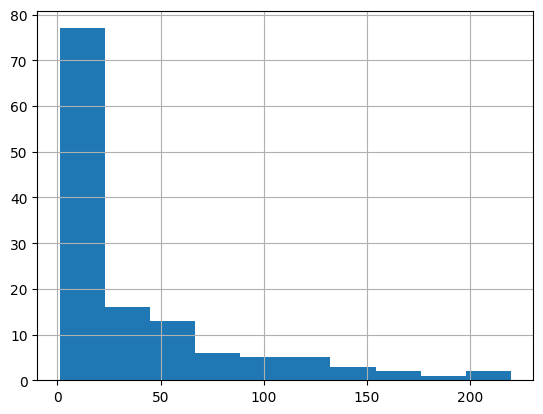

In [7]:
# a great way to plot any column in a data frame is as follows:
# let's consider the co2_emission for rice consumption
rice_con = f_c[f_c['food_category'] == 'rice']
rice_con['co2_emission'].hist()
plt.show()

In [8]:
# such plot (curves) are labeled as right skewed (the large number of counts is on the left). For skewed (left or right), 
# median is most likely a better measurement of the center of the data


### Measures of spread
As its name indicates, spread in this context refers to how close / far the data points are from each other. There is a number of measures:
* variance: $\begin{align} \sum_{i=1}^{n} \frac{(x_i - \bar{x})^2}{n - 1} 
\end{align}$ 
It roughly speaking calculates the average square distance of any point from the data mean.
* standard deviation: the square root of the variance, more intuitive as it is not in measurement unit squared
* Mean absolute deviation: calculated as follows:
$\begin{align} \sum_{i=1}^{n} \frac{|x_i - \bar{x}|}{n - 1} 
\end{align}$

The  variance is preferred to Mean absolute deviation as it penalizes larger distances more significantly than smaller ones. It is the same 
analogy between ***Mean Squarred Error*** and ***Mean Absolute Error***  

Quantiles or percentiles can be considered bins where the each bin contains the same number of elements. A specific type of quantiles is quite popular: ***Quartiles*** where the data is divided into $4$ groups: [0, 0.25, 0.5, 0.75, 1].


#### Quartiles
The procedure of calculating quartiles takes the following steps:
1. calculating the median: also referred to as $Q2$
2. calculating $Q1$ and $Q3$ denoted respetively as the first and third quantiles. They are determined as the values taken by $25%$ of the data larger and smaller than the median
3. defining the IQR (inter-quantile-range) as $Q3 - Q1$, we calculate the extremums as:
    * max = Q3 + 1.5 * IQR
    * min = Q1 - 1.5 * IQR

Data larger than the max or smaller than the min are considered outliers.

## Chapter 2: Probability aspects in Python
We first consider two different types of experiements. Assuming we have $n$ (or infinitely many) outcomes. If we repeat the experiment and a certain outcome:
1. cannot occur another time after its first occurence: ***without replacement***
2. can occur multiple times: ***with replacement*** 


The law of large numbers indicates: the larger the size of the sample is, the closer the mean will be to the expected value, or also referred to as the theoretical mean.


In [ ]:
# the following code simulates sampling without replacement
seed_val = 3 # to ensure reproducibility
np.random.seed(seed_val)
f_c.sample(5, replace=False) # the replace argument when set to True will perform sampling with replacement


## Distributions
There are mainly two types of distributions:
1. Continuous distribution where values range over real continous numbers. Such experiments are associated with 
    * uniform distribution
    * normal distribution
    * exponential distribution

2. Discrete distribution where value range over discrete values:
    * binominal
    * Poisson


In [10]:
## uniform distribution
from scipy.stats import uniform
# the probability of having a value less than x given min and max bounds
min = 0
max = 20

x = np.random.randint(min, max)
prob = uniform.cdf(x, min, max)

# generating values according to the uniform distribution
num_values = 1000
values = uniform.rvs(min, max, size=num_values)

In [ ]:
from scipy.stats import binom 
# generate a sequence of values
num_coins = 10
prob_head = 0.5
num_times = 10
seq = binom.rvs(num_coins, prob_head, size=num_times) # returns the number of success in each flip
# calculate the probability of having less than x heads out of n flips
n_flips = 10
x = 5
prob_less_x = binom.cdf(x, n_flips, prob_head)

prob_x = binom.pmf(x, n_flips, prob_head)

In [11]:
# normal distribution
from scipy.stats import norm
# consider the probability of having a value less than x
bound, mean, var = 50, 60, 4
prob = norm.cdf(bound, mean, var)
# generate a sequence of values satisfying the normal distribution
size = 50
seq = norm.rvs(mean, var, size=50)

# find the value y for which the probability of having values larger than y is per
per = 0.9
y = norm.ppf(per, mean, var) # a value generated by this distribution has per (chance) of being larger than y


### Central Limit Theorem
This theorem is the reason behind the popularity and most importantly significance of normal distribution. All distributions, discrete or continous, for an infinite number $n$ of samples behave exactly like a normal distribution.  
The CLT applies only in case of random and independent samples.

#### The statistical applications
let's first consider the notion of sampling distributions. Let's consider the following experiement, at each iteration, we calculate a statistics of the sample, taken. Then we consider the distribution of this statistics. 
Such distributions are referred to as ***Sampling distributions***. For large number of samples, sampling distributions will get closer and closer to the normal distribution. In case of unknown distribution, or limited resources, the characteristics of a random variable can be approximated by calculating the sampling distributions for a large number of iterations.

In [16]:
# the Poisson distribution chracterized by the mean
from scipy.stats import poisson
pois_mean  = 2

# the probability of having a value less than x with pois_mean
x = np.random.randint(2, 5)
less_than_x = poisson.cdf(x, pois_mean)
# the probability of having exactly x

exactly_x = poisson.pmf(x, pois_mean)
seq_pois = poisson.rvs(pois_mean, size=100)

### Correlation
Correlation is one way to express the relationship between two variables numerically. It is a mathematical tool that ranges from $1$ to $-1$. Values (generally) starting from $\approx 0.75$ (in absolute value)represent quite a strong relationship between two variables. Values closer to $0$ denote that the relationship is less than less significant. The direction is reprented by the sign.  
It is important to keep in mind that the correlation is mainly linear. For non-linear relationships, this measurement can be highly misleading.
Thus, certain transformations might be necessary to reveal how related two variables actually are. Among the most popular:
* $\log x$ transformation
* square root: $\sqrt x$ transformation
* reciprocal: $\frac{1}{x}$ transformation
* a combination of those applied either to one or both variables

#### why transformations ?
certain statistical tools are built on the assumption that variables are linearly correlated (or close)

#### Correlation != causation
It might be tempting to confuse both. If $x$ and $y$ are correlated, it does not necessarily mean that one causes the other. Such conclusions should refer to domain expertise before being made public. One important reason, is confounding which can be broadly described as follows:
1. x is associated with y 
2. y (scientifically proven) to cause z
3. the trap is to actually say that $x$ causes with $z$, even though both correlate significantly. $y$ is said to be the ***confounder***